In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import random

file_path = "../../web_service_dataset.csv"
df_original = pd.read_csv(file_path)

print(df_original.shape)

(2704839, 46)


In [2]:
df_original

,src_ip,src_port,dst_ip,dst_port,proto,pktTotalCount,octetTotalCount,min_ps,max_ps,avg_ps,...,b_std_dev_ps,b_flowStart,b_flowEnd,b_flowDuration,b_min_piat,b_max_piat,b_avg_piat,b_std_dev_piat,category,web_service
0,192.168.121.1,67,172.16.255.185,67,UDP,22,7620,328,394,346.363636,...,2.000000,1.555955e+09,1.555955e+09,1.554399e+12,1.035380e-02,198.657965,51.689181,84.916348,Network,DHCP
1,192.168.121.1,67,172.16.255.186,67,UDP,17,5670,328,354,333.529412,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,Network,DHCP
2,192.168.121.1,67,172.16.255.185,67,UDP,43,15124,328,394,351.720930,...,1.332347,1.555964e+09,1.555965e+09,1.554409e+12,2.233195e-02,340.268454,89.927588,124.270745,Network,DHCP
3,192.168.121.1,67,172.16.255.186,67,UDP,30,10086,328,352,336.200000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,Network,DHCP
4,192.168.121.1,0,10.130.1.166,0,ICMP,1,56,56,56,56.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,Network,ICMP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2704834,192.168.128.252,137,172.16.255.186,137,UDP,9,702,78,78,78.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,System,NetBIOS
2704835,192.168.128.252,138,172.16.255.185,138,UDP,3,687,229,229,229.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,System,NetBIOS
2704836,192.168.128.252,138,172.16.255.186,138,UDP,3,687,229,229,229.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,System,NetBIOS
2704837,192.168.128.252,49879,108.177.11.188,5228,TCP,75,3520,40,66,46.933333,...,4.228907,1.559770e+09,1.559771e+09,1.558211e+12,1.150203e-02,90.155711,44.999017,14.822745,Web,Google


In [16]:
# 3.1

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import random
df_copy = df_original.copy()
# Define label (non-numerical) columns
label_columns = ['src_ip', 'src_port', 'dst_ip', 'dst_port', 'category', 'web_service', 'proto']

# Store the label columns in a separate DataFrame
df_labels = df_copy[label_columns]

# Drop label columns from the numerical dataset
df_copy = df_copy.drop(label_columns, axis=1)

# Standardize the numerical columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_copy)

# Create a new DataFrame with scaled numerical data
df_scaled = pd.DataFrame(scaled_data, columns=df_copy.columns)

# Add the label columns back to the scaled DataFrame
df_scaled = pd.concat([df_scaled, df_labels.reset_index(drop=True)], axis=1)

# Confirm scaling
print("Scaled data shape:", df_scaled.shape)


Scaled data shape: (2704839, 46)


In [17]:
df_scaled

,pktTotalCount,octetTotalCount,min_ps,max_ps,avg_ps,std_dev_ps,flowStart,flowEnd,flowDuration,min_piat,...,b_max_piat,b_avg_piat,b_std_dev_piat,src_ip,src_port,dst_ip,dst_port,category,web_service,proto
0,-0.017654,-0.018223,4.478531,-0.290998,0.344931,-0.466290,-0.800156,-0.799133,9.045503,-0.055404,...,2.987091,1.279851,4.959656,192.168.121.1,67,172.16.255.185,67,Network,DHCP,UDP
1,-0.018969,-0.018580,4.478531,-0.304607,0.307364,-0.495915,-0.800156,-0.799133,9.045503,-0.055098,...,-0.258028,-0.111224,-0.248445,192.168.121.1,67,172.16.255.186,67,Network,DHCP,UDP
2,-0.012135,-0.016847,4.478531,-0.290998,0.360613,-0.464258,-0.793921,-0.793053,7.670823,-0.055407,...,5.300328,2.308934,7.373345,192.168.121.1,67,172.16.255.185,67,Network,DHCP,UDP
3,-0.015552,-0.017770,4.478531,-0.305287,0.315181,-0.494202,-0.793921,-0.793053,7.670822,-0.054947,...,-0.258028,-0.111224,-0.248445,192.168.121.1,67,172.16.255.186,67,Network,DHCP,UDP
4,-0.023174,-0.019609,-0.037019,-0.405993,-0.505003,-0.512978,-0.792105,-0.792138,-0.294316,-0.055414,...,-0.258028,-0.111224,-0.248445,192.168.121.1,0,10.130.1.166,0,Network,ICMP,ICMP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2704834,-0.021071,-0.019491,0.328210,-0.398508,-0.440606,-0.512978,1.569307,1.569882,5.082190,-0.032670,...,-0.258028,-0.111224,-0.248445,192.168.128.252,137,172.16.255.186,137,System,NetBIOS,UDP
2704835,-0.022648,-0.019494,2.835004,-0.347135,0.001392,-0.512978,1.569058,1.569918,7.602423,21.841174,...,-0.258028,-0.111224,-0.248445,192.168.128.252,138,172.16.255.185,138,System,NetBIOS,UDP
2704836,-0.022648,-0.019494,2.835004,-0.347135,0.001392,-0.512978,1.569058,1.569918,7.602423,21.841178,...,-0.258028,-0.111224,-0.248445,192.168.128.252,138,172.16.255.186,138,System,NetBIOS,UDP
2704837,-0.003724,-0.018974,-0.302639,-0.402591,-0.531542,-0.500497,1.569050,1.570078,9.092950,-0.055064,...,1.214685,1.099803,0.660666,192.168.128.252,49879,108.177.11.188,5228,Web,Google,TCP


In [18]:
# 3.1

# Group the data by 'web_service' and count the unique 'category' values
web_service_category_counts = df_original.groupby('web_service')['category'].nunique()

# Filter web services that have more than 1 traffic category
multiple_categories = web_service_category_counts[web_service_category_counts > 1]

# Display how many web services have multiple categories
print(f"Number of web services with multiple traffic categories: {len(multiple_categories)}")

# Identify the web service with the most traffic categories
web_service_most_categories = multiple_categories.idxmax()
most_categories_count = multiple_categories.max()

print(f"The web service with the most traffic categories is '{web_service_most_categories}' "
      f"with {most_categories_count} categories.")

Number of web services with multiple traffic categories: 5
The web service with the most traffic categories is 'DNS' with 4 categories.


In [9]:
num_different_wservices = df_original['web_service'].nunique()
num_different_wservices

141

In [28]:
# 3.2
# Select only columns of the features
df_scaled_features = df_scaled.drop(label_columns, axis =1)

<>:24: SyntaxWarning: invalid escape sequence '\s'
<>:24: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Nuovo Utente\AppData\Local\Temp\ipykernel_6796\2098115749.py:24: SyntaxWarning: invalid escape sequence '\s'
  plt.title(f'15 PCs explain {round(perc_cumul_exp_var[14], 2)}% of $\sigma^2$')


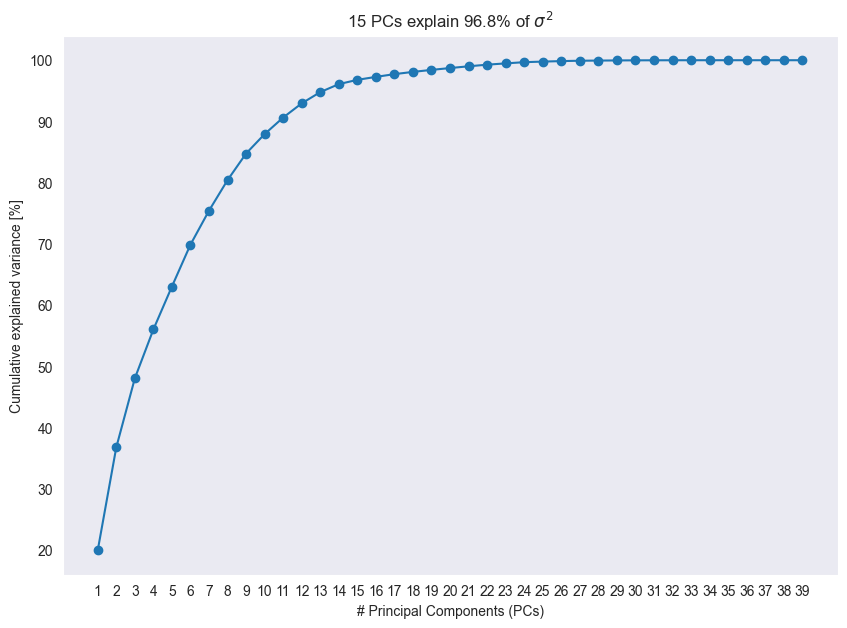

In [40]:
# 3.2
# PCA must be initialized with a random state to initialize the space
pca = PCA(random_state=15)

# .fit() is used to compute the new dimensions with number of features from 1 to the number of original features
pca.fit(df_scaled_features)

# describe how much of the dataset variability is indicated by a given amount of features
explained_variance = pca.explained_variance_ratio_

# evaluate the total dataset variability while increasing the variables
cumul_exp_var = np.cumsum(explained_variance)

# percentage value to better understand the best number of components
perc_cumul_exp_var = cumul_exp_var * 100

# make the plot of cumulative explained variance wrt number of components
plt.figure(figsize=(10, 7))
plt.plot(perc_cumul_exp_var, marker='o')
plt.xlabel('# Principal Components (PCs)')
plt.ylabel('Cumulative explained variance [%]')
plt.xticks(range(len(perc_cumul_exp_var)), range(1, len(perc_cumul_exp_var) + 1))
plt.grid()
plt.title(f'15 PCs explain {round(perc_cumul_exp_var[14], 2)}% of $\sigma^2$')
# plt.tight_layout()
plt.show()


We will choose 15 components because we can clearly see that the cumulative explained variance flattens.
 Moreover, the cumulative ecplained variance with 15 components has already a nearly optimal result (96,8%).


In [33]:
print(perc_cumul_exp_var[14])

96.79613119664336


In [37]:
# 3.2

pca = PCA(n_components=15, random_state=15) 

pca.fit(df_scaled_features)
explained_variance = pca.explained_variance_ratio_ 
cumul_exp_var = np.cumsum(explained_variance) 
perc_cumul_exp_var = cumul_exp_var*100 
# print(perc_cumul_exp_var[-1])

# Transform the dataset
pca_result = pca.transform(df_scaled_features)
pca_result = pd.DataFrame(pca_result, columns=[f'PC{i}' for i in range(15)])


In [39]:
pca_result

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,10.265629,-3.125388,0.246477,-1.433726,0.149088,3.404355,-3.249564,6.304175,-6.362348,-0.293745,1.463653,6.081930,4.101982,3.082914,0.217576
1,8.231046,-4.002364,0.741956,1.563438,-4.457090,3.671469,-5.512554,3.269379,-3.345849,-0.150270,1.111530,8.640272,0.918632,-0.186000,0.424815
2,10.323759,-2.867958,0.072356,-1.931808,1.409580,3.863603,-2.971120,7.596938,-5.255861,-0.344581,1.856280,3.188270,6.011684,3.262620,0.067010
3,7.067660,-3.565378,0.664477,1.493444,-4.182588,3.713640,-5.256524,3.688709,-2.682819,-0.146886,1.109034,7.299990,0.490484,-0.152996,0.243744
4,-1.269196,-1.790586,0.413616,0.031567,-2.142481,0.259298,-1.818365,-0.301036,2.216678,0.215610,-0.645229,-0.194663,0.608509,0.001002,-0.397789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2704834,14.402512,-6.404638,0.440342,3.441146,1.544169,3.433249,-8.556845,0.944285,-2.457660,0.858604,-3.880305,1.192587,-8.420294,-0.667751,-0.104994
2704835,23.377368,-12.433620,1.734340,8.361292,-15.610620,-9.494147,3.132589,-13.582214,-13.257483,-0.634814,2.275672,-0.241189,5.155879,-0.157510,0.359735
2704836,23.377366,-12.433620,1.734340,8.361292,-15.610622,-9.494149,3.132592,-13.582217,-13.257484,-0.634814,2.275674,-0.241188,5.155884,-0.157509,0.359735
2704837,6.404195,-2.150704,0.304085,1.500264,3.387908,2.171169,-2.934419,-0.614924,-2.907800,-0.173370,1.223082,9.236224,3.828607,-0.086543,1.108738


In [ ]:
# 3.3